<a href="https://colab.research.google.com/github/Pusarapusowjanya/Codsoft/blob/main/Task_2_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [7]:
df = pd.read_csv('/content/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
df.shape

(200, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [16]:
X=df.drop(columns=['Sales'],axis=1)
Y=df['Sales']

In [17]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [18]:
Y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

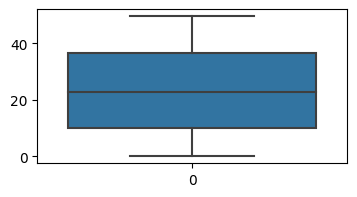

In [19]:
plt.figure(figsize = (4,2))
sns.boxplot(df['Radio'])
plt.show()

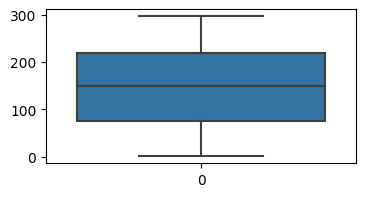

In [20]:
plt.figure(figsize = (4,2))
sns.boxplot(df['TV'])
plt.show()

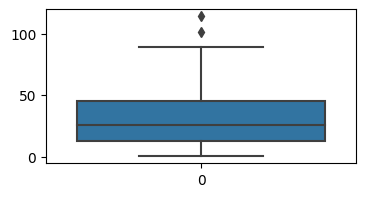

In [21]:
plt.figure(figsize = (4,2))
sns.boxplot(df['Newspaper'])
plt.show()

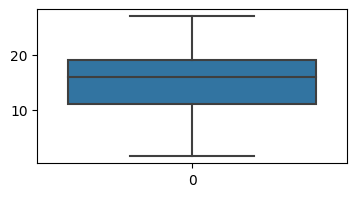

In [22]:
plt.figure(figsize = (4,2))
sns.boxplot(df['Sales'])
plt.show()

In [23]:
IQR = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)
min_value = df['Newspaper'].quantile(0.25) - (IQR*1.5)
max_value = df['Newspaper'].quantile(0.75) - (IQR*1.5)
print(min_value , "\n", max_value)

-35.775000000000006 
 -3.4250000000000043


In [24]:
df = df.copy()

In [25]:
df.loc[df['Newspaper']>93 , 'Newspaper'] = 93

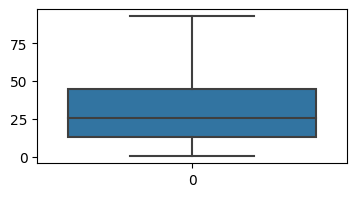

In [26]:
plt.figure(figsize=(4,2))
sns.boxplot(df['Newspaper'])
plt.show()

<Axes: >

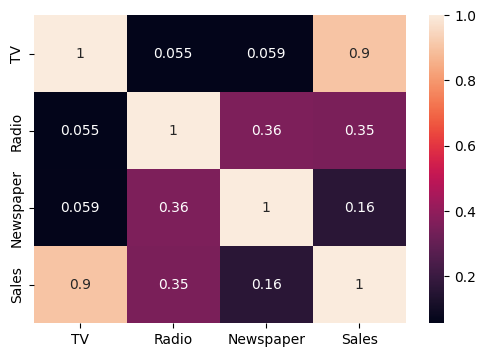

In [27]:
plt.figure(figsize = (6,4))
sns.heatmap(df.corr(), annot =True)

In [34]:
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size=0.2, random_state=2)

In [35]:
print(X.shape,X_train.shape,X_test.shape)

(200, 3) (160, 3) (40, 3)


# Model Training

In [36]:
model = LinearRegression()

In [37]:
model.fit(X_train,Y_train)

LinearRegression()

In [38]:
print('intercept:=b0', model.intercept_)
print('slope:=b1 & b2',model.coef_)

intercept:=b0 4.499831369256482
slope:=b1 & b2 [0.05536768 0.102883   0.00233839]


In [39]:
X_train_prediction = model.predict(X_train)

In [40]:
print(X_train_prediction)

[22.76688486 17.355845   21.84600341 14.9043402  21.4211498  19.04339061
 17.82669793  8.63309959 10.34299504 10.18788798 13.76570978 17.37245117
 18.86581708 18.07589513  9.28835592 15.61720283  8.77997948  5.19438608
  7.69273875 24.95986434 21.11698767 20.22168846 11.91217026 23.6098494
 21.34638726 10.83353992 20.81370719  7.0851864   5.32616384 10.95816394
 13.4573139   9.40982282 18.56500035 11.76869768 11.11245621  7.27223836
  5.94786874  9.67731873 15.98472636 21.77371257 23.11010791 23.79543162
 15.86890842 14.73870421 19.40784082 21.29072756 19.56530566 12.98448
 25.01152362 15.44113132 19.56686091  9.04971105 14.29235532 20.21274455
 14.13700703 23.72963105 17.09092701 24.28494438 19.22259634 17.21730867
 13.72518251  8.96183217 19.25785378  9.80525768 22.31587633 12.17741687
 18.22377314 20.73518572 12.28585382 17.87086326  6.31483819 16.38309437
 15.18858198 15.27168768 18.87684823 10.92890862 13.04333519 11.43983352
 10.23853413 14.95386909 12.46158401 20.82383685 10.483

In [41]:
r2 = model.score(X_train, Y_train)
print(r2)

0.9120706464620405


In [42]:
Prediction_model=[[100,100,100]]
print('Sales of Tv, Radio and Newspaper is :', model.predict(Prediction_model))

Sales of Tv, Radio and Newspaper is : [20.55873792]
